In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')   
pd.options.display.float_format = '{:.6f}'.format
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
sns.set_style(style='darkgrid')

In [21]:
df = pd.read_csv('winequality-red.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.200000,0.600000,0.080000,2.000000,0.090000,32.000000,44.000000,0.994900,3.450000,0.580000,10.500000,5
1595,5.900000,0.550000,0.100000,2.200000,0.062000,39.000000,51.000000,0.995120,3.520000,0.760000,11.200000,6
1596,6.300000,0.510000,0.130000,2.300000,0.076000,29.000000,40.000000,0.995740,3.420000,0.750000,11.000000,6
1597,5.900000,0.645000,0.120000,2.000000,0.075000,32.000000,44.000000,0.995470,3.570000,0.710000,10.200000,5


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [23]:
df['quality'] = df['quality'].astype('object')

In [24]:
df_num = df.select_dtypes(include=np.number)
df_num

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.200000,0.600000,0.080000,2.000000,0.090000,32.000000,44.000000,0.994900,3.450000,0.580000,10.500000
1595,5.900000,0.550000,0.100000,2.200000,0.062000,39.000000,51.000000,0.995120,3.520000,0.760000,11.200000
1596,6.300000,0.510000,0.130000,2.300000,0.076000,29.000000,40.000000,0.995740,3.420000,0.750000,11.000000
1597,5.900000,0.645000,0.120000,2.000000,0.075000,32.000000,44.000000,0.995470,3.570000,0.710000,10.200000


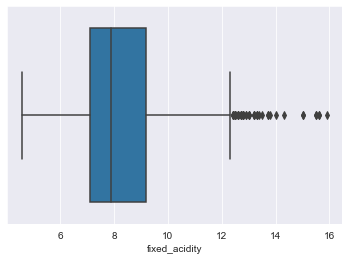

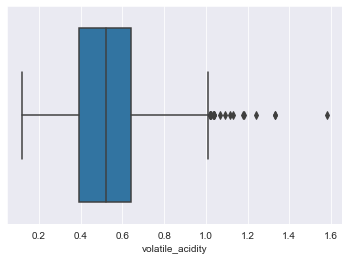

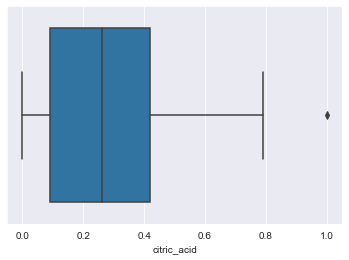

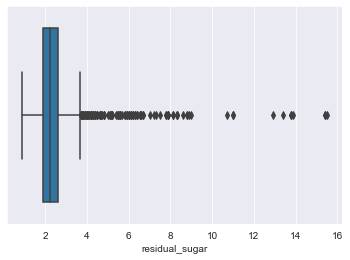

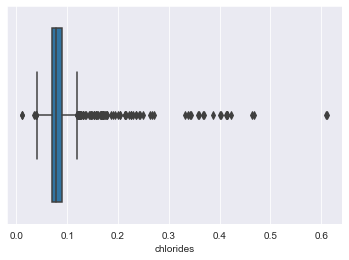

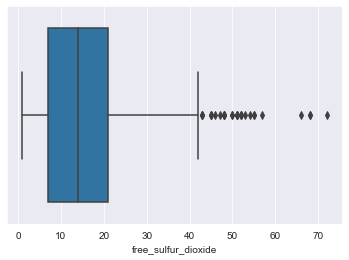

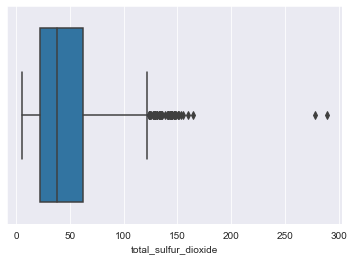

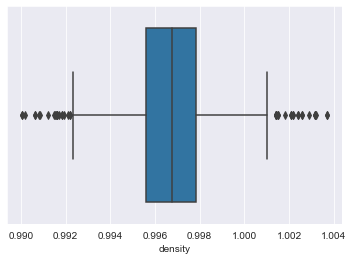

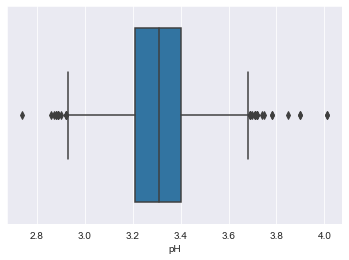

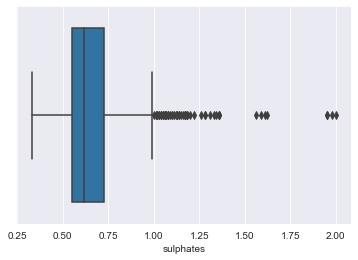

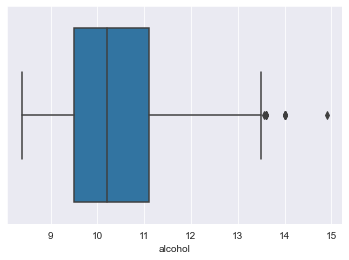

In [25]:
for i in df_num.columns:
    sns.boxplot(x= df_num[i])
    plt.show()

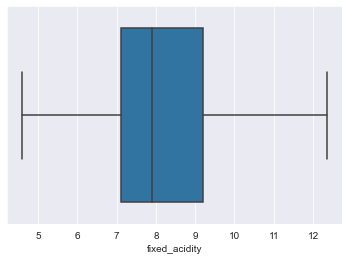

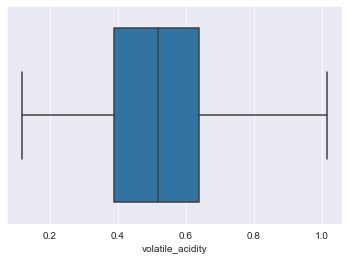

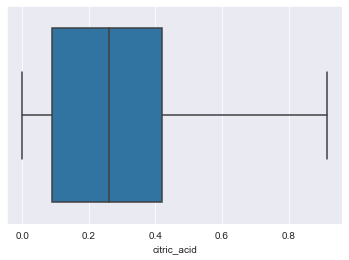

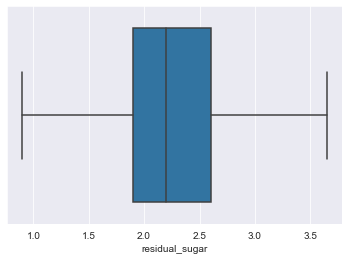

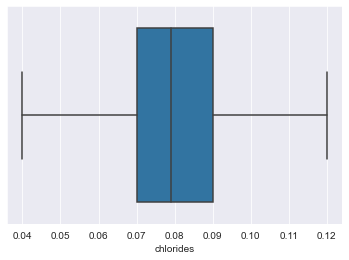

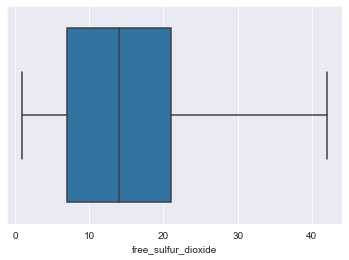

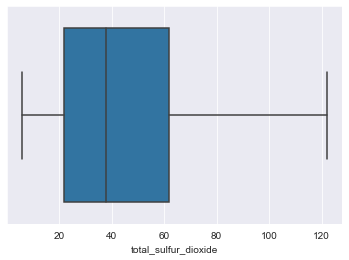

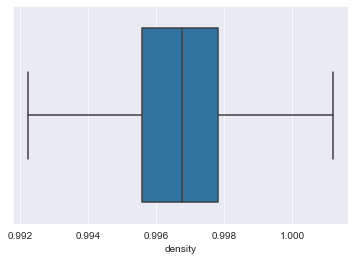

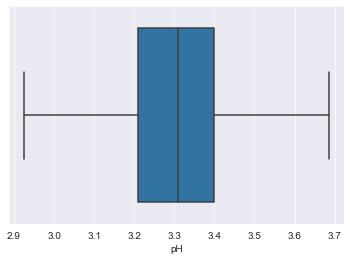

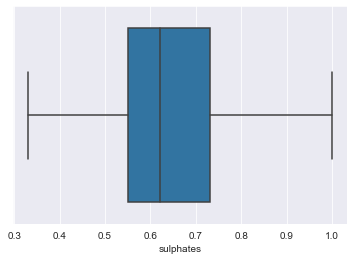

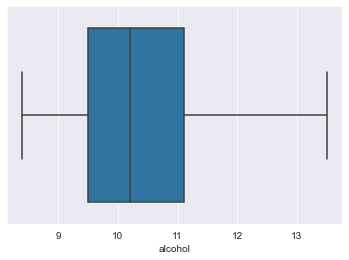

In [26]:
for i in df_num.columns:
    q1 = df_num[i].quantile(0.25)
    q3 = df_num[i].quantile(0.75)
    IQR = q3-q1
    ll = q1 - 1.5*IQR
    ul = q3 + 1.5*IQR
    for j in df_num.index:
        if df_num.loc[j,i] < ll:
            df_num.loc[j,i] = ll
        if df_num.loc[j,i] >ul:
            df_num.loc[j,i] = ul
for i in df_num.columns:
    sns.boxplot(x= df_num[i])
    plt.show()

In [27]:
df_num.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [28]:
# No Missing Values

In [29]:
scalar = StandardScaler()
df_sc = scalar.fit_transform(df_num)
df_sc = pd.DataFrame(data=df_sc,columns=df_num.columns)
df_sc

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.538197,0.997591,-1.392540,-0.693182,-0.291550,-0.476813,-0.385806,0.585705,1.332717,-0.655496,-0.966950
1,-0.296555,2.032132,-1.392540,0.455672,0.943237,0.946759,0.700988,0.031853,-0.736650,0.220142,-0.587615
2,-0.296555,1.342438,-1.186940,-0.036694,0.606477,-0.070078,0.272857,0.142624,-0.336128,0.001232,-0.587615
3,1.757401,-1.416339,1.485857,-0.693182,-0.347676,0.133289,0.470456,0.696475,-1.003665,-0.509557,-0.587615
4,-0.538197,0.997591,-1.392540,-0.693182,-0.291550,-0.476813,-0.385806,0.585705,1.332717,-0.655496,-0.966950
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.263123,0.422846,-0.981340,-0.529060,0.494223,1.658544,-0.056475,-1.020464,0.932194,-0.509557,0.076221
1595,-1.444355,0.135473,-0.878541,-0.200816,-1.077323,2.370330,0.174058,-0.898617,1.399470,0.803900,0.740057
1596,-1.202713,-0.094425,-0.724341,-0.036694,-0.291550,1.353493,-0.188207,-0.555229,0.731933,0.730930,0.550389
1597,-1.444355,0.681481,-0.775741,-0.529060,-0.347676,1.658544,-0.056475,-0.704769,1.733239,0.439051,-0.208280


## Find pattern and the best value of.the K for the following features.

### 1. Use feautes fixed acidity and volatile acidity 

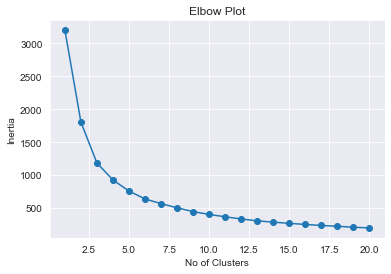

In [105]:
df1 = df_sc[['fixed_acidity','volatile_acidity']]
err = []
for i in range(1,21):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(df1)
    err.append(km.inertia_)
    
plt.plot(range(1,21),err,marker='o')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [106]:
for i in range(2,21):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(df1)
    print('silhouette_score for', i, 'clusters is', silhouette_score(df1,km.labels_))

silhouette_score for 2 clusters is 0.40663131497544897
silhouette_score for 3 clusters is 0.38263633241235684
silhouette_score for 4 clusters is 0.3629190208804383
silhouette_score for 5 clusters is 0.3679856680905061
silhouette_score for 6 clusters is 0.3494538934081591
silhouette_score for 7 clusters is 0.34219435619467964
silhouette_score for 8 clusters is 0.3396099102496398
silhouette_score for 9 clusters is 0.3319183931057958
silhouette_score for 10 clusters is 0.3392409036894655
silhouette_score for 11 clusters is 0.34632640871089254
silhouette_score for 12 clusters is 0.3482283260519006
silhouette_score for 13 clusters is 0.3597395389014677
silhouette_score for 14 clusters is 0.3510993250200964
silhouette_score for 15 clusters is 0.3519514158147338
silhouette_score for 16 clusters is 0.35278240891302814
silhouette_score for 17 clusters is 0.3490279574023076
silhouette_score for 18 clusters is 0.34586503903764515
silhouette_score for 19 clusters is 0.3492820653739004
silhouette_s

In [107]:
model = KMeans(n_clusters=3,random_state=100)
model.fit(df1)
model.labels_

array([0, 0, 0, ..., 1, 0, 1])

In [108]:
df1_us = df[['fixed_acidity','volatile_acidity']]
df1_us['Label'] = model.labels_
df1_us

,fixed_acidity,volatile_acidity,Label
0,7.400000,0.700000,0
1,7.800000,0.880000,0
2,7.800000,0.760000,0
3,11.200000,0.280000,2
4,7.400000,0.700000,0
...,...,...,...
1594,6.200000,0.600000,0
1595,5.900000,0.550000,0
1596,6.300000,0.510000,1
1597,5.900000,0.645000,0


In [111]:
df1_us['Label'].value_counts()

0    659
1    567
2    373
Name: Label, dtype: int64

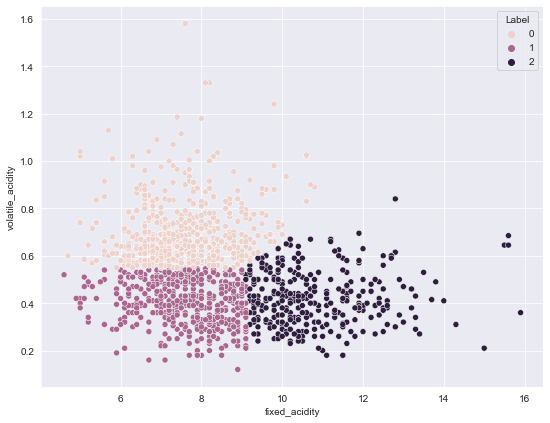

In [112]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=df1_us['fixed_acidity'],y=df1_us['volatile_acidity'],hue=df1_us['Label'])
plt.show()

In [ ]:
# Infrence

### 2. Use feautes Cirtic acidity and fixed acidity

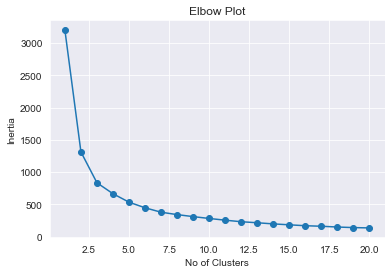

In [113]:
df2 = df_sc[['fixed_acidity','citric_acid']]
err = []
for i in range(1,21):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(df2)
    err.append(km.inertia_)
    
plt.plot(range(1,21),err,marker='o')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [114]:
for i in range(2,21):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(df2)
    print('silhouette_score for', i, 'clusters is', silhouette_score(df2,km.labels_))

silhouette_score for 2 clusters is 0.5007174372998626
silhouette_score for 3 clusters is 0.4332091334852673
silhouette_score for 4 clusters is 0.37782056557755433
silhouette_score for 5 clusters is 0.3957599113924231
silhouette_score for 6 clusters is 0.39003646575189493
silhouette_score for 7 clusters is 0.3641933266341618
silhouette_score for 8 clusters is 0.36297055832331543
silhouette_score for 9 clusters is 0.35520037852087244
silhouette_score for 10 clusters is 0.3516307653737699
silhouette_score for 11 clusters is 0.3672089615912953
silhouette_score for 12 clusters is 0.36748264728274727
silhouette_score for 13 clusters is 0.3599419679175719
silhouette_score for 14 clusters is 0.36820566679798794
silhouette_score for 15 clusters is 0.363105624937017
silhouette_score for 16 clusters is 0.36780491879809246
silhouette_score for 17 clusters is 0.355847943035616
silhouette_score for 18 clusters is 0.3703699828056456
silhouette_score for 19 clusters is 0.3718902371116192
silhouette_sc

In [115]:
model = KMeans(n_clusters=4,random_state=100)
model.fit(df2)
model.labels_

array([3, 3, 3, ..., 3, 3, 0])

In [116]:
df2_us = df[['fixed_acidity','citric_acid']]
df2_us['Label'] = model.labels_
df2_us

,fixed_acidity,citric_acid,Label
0,7.400000,0.000000,3
1,7.800000,0.000000,3
2,7.800000,0.040000,3
3,11.200000,0.560000,2
4,7.400000,0.000000,3
...,...,...,...
1594,6.200000,0.080000,3
1595,5.900000,0.100000,3
1596,6.300000,0.130000,3
1597,5.900000,0.120000,3


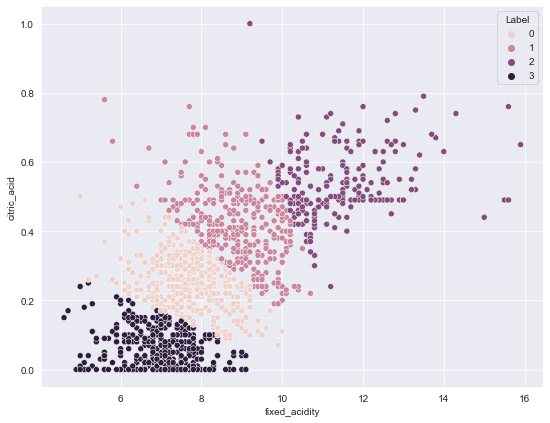

In [117]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=df2_us['fixed_acidity'],y=df2_us['citric_acid'],hue=df2_us['Label'])
plt.show()

### 3. Use feautes residual suger and sulphades

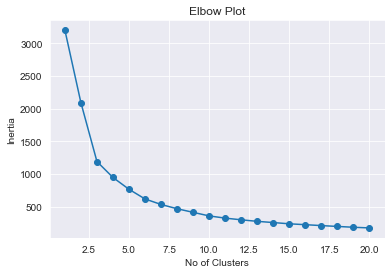

In [118]:
df3 = df_sc[['residual_sugar','sulphates']]
err = []
for i in range(1,21):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(df3)
    err.append(km.inertia_)
    
plt.plot(range(1,21),err,marker='o')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [119]:
for i in range(2,21):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(df3)
    print('silhouette_score for', i, 'clusters is', silhouette_score(df3,km.labels_))

silhouette_score for 2 clusters is 0.4118433070627681
silhouette_score for 3 clusters is 0.4431259495559467
silhouette_score for 4 clusters is 0.36008139962082497
silhouette_score for 5 clusters is 0.36827523925134437
silhouette_score for 6 clusters is 0.36571446426167126
silhouette_score for 7 clusters is 0.3664466702548363
silhouette_score for 8 clusters is 0.36134905206535634
silhouette_score for 9 clusters is 0.35743527728862184
silhouette_score for 10 clusters is 0.36502733591694025
silhouette_score for 11 clusters is 0.36137906628404487
silhouette_score for 12 clusters is 0.35385705533331047
silhouette_score for 13 clusters is 0.35895101258399104
silhouette_score for 14 clusters is 0.3597071965295068
silhouette_score for 15 clusters is 0.35803435723800775
silhouette_score for 16 clusters is 0.3597260197168649
silhouette_score for 17 clusters is 0.3541115599391955
silhouette_score for 18 clusters is 0.3587790573036687
silhouette_score for 19 clusters is 0.3605549770499319
silhouet

In [126]:
model = KMeans(n_clusters=4,random_state=100)
model.fit(df3)
model.labels_

array([1, 0, 0, ..., 2, 2, 3])

In [127]:
df3_us = df[['residual_sugar','sulphates']]
df3_us['Label'] = model.labels_
df3_us

,residual_sugar,sulphates,Label
0,1.900000,0.560000,1
1,2.600000,0.680000,0
2,2.300000,0.650000,0
3,1.900000,0.580000,1
4,1.900000,0.560000,1
...,...,...,...
1594,2.000000,0.580000,1
1595,2.200000,0.760000,2
1596,2.300000,0.750000,2
1597,2.000000,0.710000,2


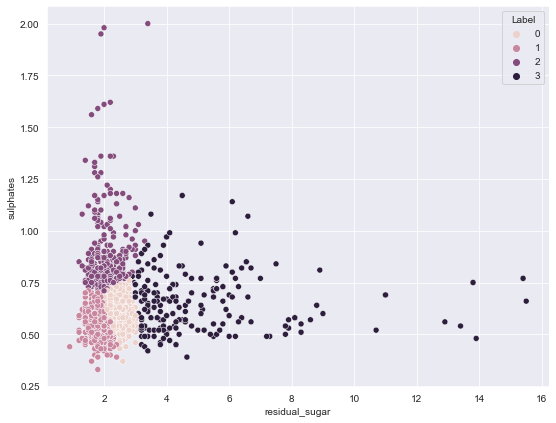

In [128]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=df3_us['residual_sugar'],y=df3_us['sulphates'],hue=df3_us['Label'])
plt.show()

### 4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide

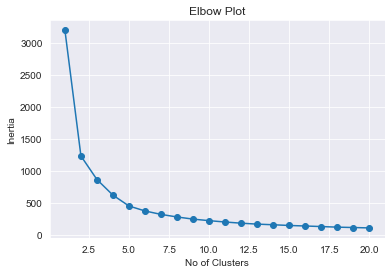

In [129]:
df4 = df_sc[['free_sulfur_dioxide','total_sulfur_dioxide']]
err = []
for i in range(1,21):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(df4)
    err.append(km.inertia_)
    
plt.plot(range(1,21),err,marker='o')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [130]:
for i in range(2,21):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(df4)
    print('silhouette_score for', i, 'clusters is', silhouette_score(df4,km.labels_))

silhouette_score for 2 clusters is 0.5479093545520826
silhouette_score for 3 clusters is 0.45075319456128826
silhouette_score for 4 clusters is 0.445580614401451
silhouette_score for 5 clusters is 0.4590353538389127
silhouette_score for 6 clusters is 0.4448146509761374
silhouette_score for 7 clusters is 0.4377660307869428
silhouette_score for 8 clusters is 0.39122102491085003
silhouette_score for 9 clusters is 0.3947096796927692
silhouette_score for 10 clusters is 0.3987573077498336
silhouette_score for 11 clusters is 0.39653293539252676
silhouette_score for 12 clusters is 0.38340421520317625
silhouette_score for 13 clusters is 0.38802560449937895
silhouette_score for 14 clusters is 0.3868770260750019
silhouette_score for 15 clusters is 0.37422707942233546
silhouette_score for 16 clusters is 0.36577515192672194
silhouette_score for 17 clusters is 0.36930095908048244
silhouette_score for 18 clusters is 0.38012184050601794
silhouette_score for 19 clusters is 0.38460399071069357
silhouett

In [131]:
model = KMeans(n_clusters=4,random_state=100)
model.fit(df4)
model.labels_

array([0, 1, 0, ..., 1, 1, 0])

In [132]:
df4_us = df[['free_sulfur_dioxide','total_sulfur_dioxide']]
df4_us['Label'] = model.labels_
df4_us

,free_sulfur_dioxide,total_sulfur_dioxide,Label
0,11.000000,34.000000,0
1,25.000000,67.000000,1
2,15.000000,54.000000,0
3,17.000000,60.000000,0
4,11.000000,34.000000,0
...,...,...,...
1594,32.000000,44.000000,1
1595,39.000000,51.000000,1
1596,29.000000,40.000000,1
1597,32.000000,44.000000,1


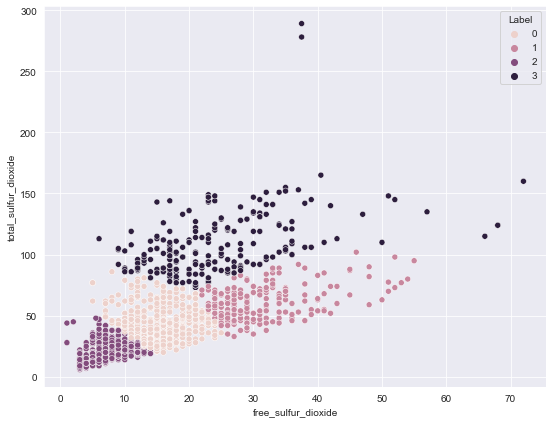

In [134]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=df4_us['free_sulfur_dioxide'],y=df4_us['total_sulfur_dioxide'],hue=df4_us['Label'])
plt.show()

### 5. Use feautes fixed acidity, citric acidity and volatile acidity

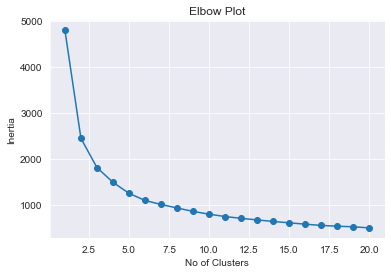

In [148]:
df5 = df_sc[['fixed_acidity','citric_acid','volatile_acidity']]
err = []
for i in range(1,21):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(df5)
    err.append(km.inertia_)
    
plt.plot(range(1,21),err,marker='o')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [149]:
for i in range(2,21):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(df5)
    print('silhouette_score for', i, 'clusters is', silhouette_score(df5,km.labels_))

silhouette_score for 2 clusters is 0.42172089725662476
silhouette_score for 3 clusters is 0.35479604299054046
silhouette_score for 4 clusters is 0.3072366346789177
silhouette_score for 5 clusters is 0.32378369428979437
silhouette_score for 6 clusters is 0.30914405783255444
silhouette_score for 7 clusters is 0.28611287658824003
silhouette_score for 8 clusters is 0.28609963692598334
silhouette_score for 9 clusters is 0.28232106290076997
silhouette_score for 10 clusters is 0.2685059769103834
silhouette_score for 11 clusters is 0.28035093515190634
silhouette_score for 12 clusters is 0.27648555448344647
silhouette_score for 13 clusters is 0.2632193837938677
silhouette_score for 14 clusters is 0.2659823245888363
silhouette_score for 15 clusters is 0.2756265383114193
silhouette_score for 16 clusters is 0.26517810716751444
silhouette_score for 17 clusters is 0.2697211020600605
silhouette_score for 18 clusters is 0.2594432547464878
silhouette_score for 19 clusters is 0.25460076641415147
silhoue

In [150]:
model = KMeans(n_clusters=3,random_state=100)
model.fit(df5)
model.labels_

array([0, 0, 0, ..., 0, 0, 1])

In [151]:
df5_us = df[['fixed_acidity','citric_acid','volatile_acidity']]
df5_us['Label'] = model.labels_
df5_us

,fixed_acidity,citric_acid,volatile_acidity,Label
0,7.400000,0.000000,0.700000,0
1,7.800000,0.000000,0.880000,0
2,7.800000,0.040000,0.760000,0
3,11.200000,0.560000,0.280000,2
4,7.400000,0.000000,0.700000,0
...,...,...,...,...
1594,6.200000,0.080000,0.600000,0
1595,5.900000,0.100000,0.550000,0
1596,6.300000,0.130000,0.510000,0
1597,5.900000,0.120000,0.645000,0


In [152]:
sns.pairplot(df5_us[['fixed_acidity','citric_acid','volatile_acidity']], hue=df5_us['Label'])
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### 6. Use feautes density and pH

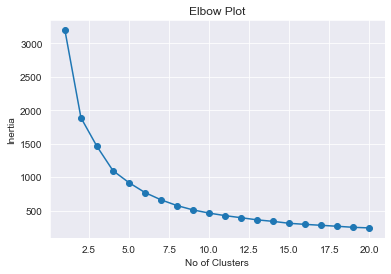

In [140]:
df6 = df_sc[['density','pH']]
err = []
for i in range(1,21):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(df6)
    err.append(km.inertia_)
    
plt.plot(range(1,21),err,marker='o')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [141]:
for i in range(2,21):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(df6)
    print('silhouette_score for', i, 'clusters is', silhouette_score(df6,km.labels_))

silhouette_score for 2 clusters is 0.3578944764656772
silhouette_score for 3 clusters is 0.3028592308346565
silhouette_score for 4 clusters is 0.3252161523575282
silhouette_score for 5 clusters is 0.33142505383952375
silhouette_score for 6 clusters is 0.3336379687441855
silhouette_score for 7 clusters is 0.3446896840538542
silhouette_score for 8 clusters is 0.34173107556947124
silhouette_score for 9 clusters is 0.3461609424929292
silhouette_score for 10 clusters is 0.3436807225039488
silhouette_score for 11 clusters is 0.339914741809761
silhouette_score for 12 clusters is 0.3391757341149942
silhouette_score for 13 clusters is 0.34660109902297903
silhouette_score for 14 clusters is 0.33689568538476344
silhouette_score for 15 clusters is 0.3477129553650381
silhouette_score for 16 clusters is 0.34953865232998027
silhouette_score for 17 clusters is 0.3549916731221141
silhouette_score for 18 clusters is 0.3583289451679313
silhouette_score for 19 clusters is 0.35664072831984067
silhouette_sc

In [142]:
model = KMeans(n_clusters=3,random_state=100)
model.fit(df6)
model.labels_

array([2, 0, 0, ..., 2, 2, 2])

In [143]:
df6_us = df[['density','pH']]
df6_us['Label'] = model.labels_
df6_us

,density,pH,Label
0,0.997800,3.510000,2
1,0.996800,3.200000,0
2,0.997000,3.260000,0
3,0.998000,3.160000,1
4,0.997800,3.510000,2
...,...,...,...
1594,0.994900,3.450000,2
1595,0.995120,3.520000,2
1596,0.995740,3.420000,2
1597,0.995470,3.570000,2


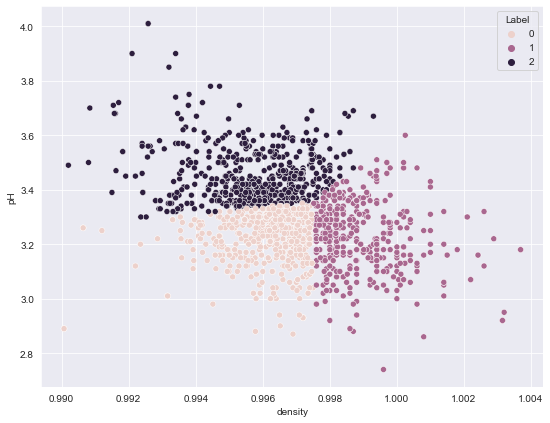

In [144]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=df6_us['density'],y=df6_us['pH'],hue=df6_us['Label'])
plt.show()